In [36]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/minst",one_hot=True)

Extracting data/minst/train-images-idx3-ubyte.gz
Extracting data/minst/train-labels-idx1-ubyte.gz
Extracting data/minst/t10k-images-idx3-ubyte.gz
Extracting data/minst/t10k-labels-idx1-ubyte.gz


In [5]:
train_x,train_y = mnist.train.next_batch(100)
train_x.shape

(100, 784)

In [8]:
X = tf.placeholder(tf.float32,[None,784])
Y = tf.placeholder(tf.float32,[None,10])

W1 = tf.Variable(tf.random_normal([784,10]))
b1 = tf.Variable(tf.random_normal([10]))

model = tf.matmul(X,W1)+b1

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model,labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)

In [11]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 128;
total_batch = mnist.train.num_examples // batch_size
for epoch in range(15):
    total_cost = 0
    for i in range(batch_size):
        train_x,train_y = mnist.train.next_batch(batch_size)
        _,l_cost = sess.run([optimizer,cost],feed_dict={X:train_x,Y:train_y})
        total_cost += l_cost
        pass
    print(total_cost/batch_size)
    pass


3.3542889952659607
0.9408789279405028
0.7079332135617733
0.6128701425623149
0.5604628624860197
0.49037165695335716
0.5180885554291308
0.43683218478690833
0.43900391401257366
0.4089803920360282
0.406561644282192
0.3891004273900762
0.3754567881114781
0.36267802241491154
0.38427092495840043


In [13]:
is_correct = tf.equal(tf.argmax(model,1),tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))
result = sess.run(accuracy,feed_dict={X:mnist.test.images,Y:mnist.test.labels})
print(result)

0.8976


In [15]:
print(mnist.test.images[0:3])
print(mnist.test.labels[0:3])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [35]:
labels = sess.run(model,feed_dict={X:mnist.test.images[0:3]})

In [34]:
print(labels)

[[ 1.2975929e+00 -1.7827547e+01  6.8372953e-01  9.5642471e+00
  -1.6239123e+00  2.1359122e+00 -1.3566011e+01  1.9254057e+01
   2.4321074e+00  7.6602740e+00]
 [ 2.1026850e-02 -6.7507696e+00  1.5044388e+01  5.0959902e+00
  -3.6514080e+01  8.3824940e+00  1.2727129e+00 -4.4603409e+01
  -1.8127412e+00 -2.2420746e+01]
 [-1.3171693e+01  6.6449394e+00  2.8805968e-01 -4.0931356e-01
  -4.8990765e+00 -4.1200428e+00 -4.0728722e+00 -2.0464232e+00
  -1.4820461e+00 -5.1265173e+00]]


In [19]:
print(sess.run(tf.argmax(labels,1)))

[7 2 1]


In [20]:
print(np.argmax(mnist.test.labels[0:3],1))

[7 2 1]


In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

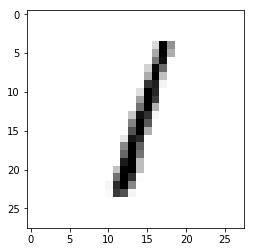

In [33]:
plt.imshow(mnist.test.images[2:3].reshape((28,28)),cmap=plt.cm.gray_r)
plt.show()    